# Implémentation :
 Réalisé par Ilyas El Amrani, Mohamed El Jaouhari, Afaf Matouk & Mouna Guerrab.<br>
 Dans cette partie, nous allons chargé nos données, les analyser , les transformer pour pouvoir construire notre modèle, par la suite nous allons utiliser les prédiction de notre modèle pour générer nos KPIs, qui seront affichés par la suite à l'aide de MS Power BI.

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données

In [137]:
df = pd.read_csv('predictive_maintenance_dataset.csv')
df.head()

date    device  failure    metric1  metric2  metric3  metric4  metric5  \
0  1/1/2015  S1F01085        0  215630672       55        0       52        6   
1  1/1/2015  S1F0166B        0   61370680        0        3        0        6   
2  1/1/2015  S1F01E6Y        0  173295968        0        0        0       12   
3  1/1/2015  S1F01JE0        0   79694024        0        0        0        6   
4  1/1/2015  S1F01R2B        0  135970480        0        0        0       15   

   metric6  metric7  metric8  metric9  
0   407438        0        0        7  
1   403174        0        0        0  
2   237394        0        0        0  
3   410186        0        0        0  
4   313173        0        0        3

In [138]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [139]:
df.failure.value_counts()

0    124388
1       106
Name: failure, dtype: int64

Donc on dispose de 124494 enregistrement,  dont 106 représentent une panne.

# Data Engineering

In [140]:
df.date = pd.to_datetime(df.date)

#Création de la colonne activedays pour pouvoir mesurer de combien de jours la machine est elle active durant cette année.
df['activedays']=df.date-df.date[0]

#Création de la colonne 'month', le mois. 
df['month']=df['date'].dt.month
#Création de la colonne 'week_day', le jour de la semaine (0 est Dimanche)
df['week_day']=df.date.dt.weekday
df['week_day'].replace(0,7,inplace=True)
df.head()

date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       55        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric8  metric9 activedays  month  week_day  
0        6   407438        0        0        7     0 days      1         3  
1        6   403174        0        0        0     0 days      1         3  
2       12   237394        0        0        0     0 days      1         3  
3        6   410186        0        0        0     0 days      1         3  
4       15   313173        0        0        3     0 days      1         3

In [141]:
#Données par mois
df.groupby('month').agg({'device':lambda x: x.nunique()})

device
month        
1        1164
2         726
3         685
4         491
5         424
6         353
7         346
8         334
9         184
10        146
11         31

On remarque que la quantité des données diminue d'un mois à l'autre d'une manière très rapide.

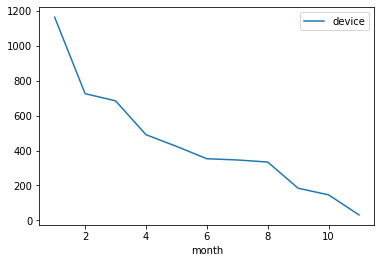

In [142]:
#machines par mois
df.groupby('month').agg({'device':lambda x: x.nunique()}).plot()
plt.show()


La même remarque sur le nombre des machines, qui diminue d'un mois à l'autre.

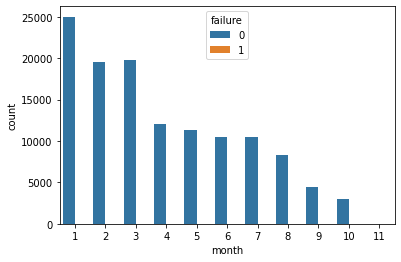

In [143]:
#Nombre de pannes et de fonctionnement normal par mois
ax = sns.countplot(x="month", hue="failure", data=df)
plt.show()

In [144]:
#Date maxmiale et minimale
max(df.date), min(df.date)

(Timestamp('2015-11-02 00:00:00'), Timestamp('2015-01-01 00:00:00'))

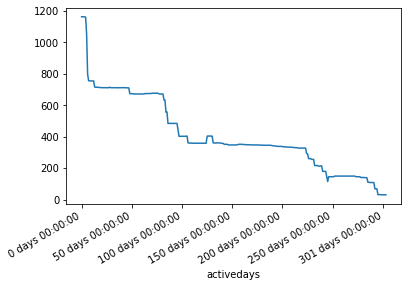

In [145]:
#Nombre de machines par journées d'activités
df.groupby('activedays')['device'].count().plot()
plt.show()

On déduit qu'un nombre très grand de machines ne diposent pas de donnés plus que de 50 jours.

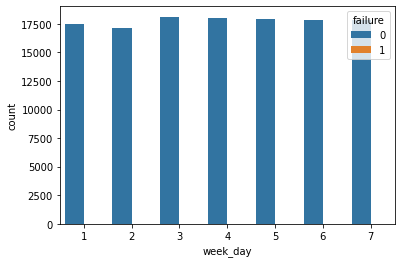

In [146]:
#Nombre de fonctionnement normale vs pannes par jour de semaine
ax = sns.countplot(x='week_day',hue='failure',data=df)
plt.show()

Le nombre de pannes est relativement très bas.

In [147]:
df_date = df.groupby('device').agg({'date':max})
df_date.date.to_dict()
#Création de la date maximale, c'est à dire la dernière date dont laquelle 
df['max_date']=df.device.map(df_date.date.to_dict())
df.head()

date    device  failure    metric1  metric2  metric3  metric4  \
0 2015-01-01  S1F01085        0  215630672       55        0       52   
1 2015-01-01  S1F0166B        0   61370680        0        3        0   
2 2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3 2015-01-01  S1F01JE0        0   79694024        0        0        0   
4 2015-01-01  S1F01R2B        0  135970480        0        0        0   

   metric5  metric6  metric7  metric8  metric9 activedays  month  week_day  \
0        6   407438        0        0        7     0 days      1         3   
1        6   403174        0        0        0     0 days      1         3   
2       12   237394        0        0        0     0 days      1         3   
3        6   410186        0        0        0     0 days      1         3   
4       15   313173        0        0        3     0 days      1         3   

    max_date  
0 2015-01-06  
1 2015-01-06  
2 2015-02-17  
3 2015-01-06  
4 2015-08-24

In [148]:
#Date maximale d'enregistrement de données par machine
df1 = df.groupby('device').agg({'date':max})
df1.head()

date
device             
S1F01085 2015-01-06
S1F013BB 2015-05-11
S1F0166B 2015-01-06
S1F01E6Y 2015-02-17
S1F01JE0 2015-01-06

In [149]:
# Nous allons maintenant essayer de créer une variable qui mesure si notre machine a tombé en panne précédemment ou pas
df1=df1.reset_index()

df=df.reset_index(drop=True) 

df2= pd.merge(df1,df,how='left',on=['device','date'])

df2.head()

device       date  failure    metric1  metric2  metric3  metric4  \
0  S1F01085 2015-01-06        0  128832128       56        0       52   
1  S1F013BB 2015-05-11        0  115676688        0        0        0   
2  S1F0166B 2015-01-06        0    7441792        0        3        0   
3  S1F01E6Y 2015-02-17        0  147350000        0        0        0   
4  S1F01JE0 2015-01-06        0  185424928        0        0        0   

   metric5  metric6  metric7  metric8  metric9 activedays  month  week_day  \
0        6   409404        0        0        7     5 days      1         1   
1        5   689161        0        0        0   130 days      5         7   
2        6   404786        0        0        0     5 days      1         1   
3       12   259491        0        0        0    47 days      2         1   
4        6   412151        0        0        0     5 days      1         1   

    max_date  
0 2015-01-06  
1 2015-05-11  
2 2015-01-06  
3 2015-02-17  
4 2015-01-06

In [150]:
df2['failure_before']=0
df2.head()

device       date  failure    metric1  metric2  metric3  metric4  \
0  S1F01085 2015-01-06        0  128832128       56        0       52   
1  S1F013BB 2015-05-11        0  115676688        0        0        0   
2  S1F0166B 2015-01-06        0    7441792        0        3        0   
3  S1F01E6Y 2015-02-17        0  147350000        0        0        0   
4  S1F01JE0 2015-01-06        0  185424928        0        0        0   

   metric5  metric6  metric7  metric8  metric9 activedays  month  week_day  \
0        6   409404        0        0        7     5 days      1         1   
1        5   689161        0        0        0   130 days      5         7   
2        6   404786        0        0        0     5 days      1         1   
3       12   259491        0        0        0    47 days      2         1   
4        6   412151        0        0        0     5 days      1         1   

    max_date  failure_before  
0 2015-01-06               0  
1 2015-05-11               0  
2 2015-01-06               0  
3 2015-02-17               0  
4 2015-01-06               0

In [151]:
#On sait, d'après l'analyse précédante que ces machines on eu déjà une panne 
df2.loc[df2.device == 'S1F136J0','failure_before'] = 1
df2.loc[df2.device == 'W1F0KCP2','failure_before'] = 1
df2.loc[df2.device == 'W1F0M35B','failure_before'] = 1
df2.loc[df2.device == 'S1F0GPFZ','failure_before'] = 1
df2.loc[df2.device == 'W1F11ZG9','failure_before'] = 1

# Data Transformation

In [152]:
cat_ftrs = ['metric3','metric4', 'metric5', 'metric7', 'metric9'] 
for col in cat_ftrs:
    df2[col]=df2[col].astype('object')

In [153]:
#Conversion des activesdays vers le type entier
def str_to_num(str):
    return str.split(' ')[0]
df2.activedays = df2.activedays.astype('str')
df2.activedays=df2.activedays.apply(str_to_num)
df2.activedays = df2.activedays.astype('int')
df2.head()

device       date  failure    metric1  metric2 metric3 metric4 metric5  \
0  S1F01085 2015-01-06        0  128832128       56       0      52       6   
1  S1F013BB 2015-05-11        0  115676688        0       0       0       5   
2  S1F0166B 2015-01-06        0    7441792        0       3       0       6   
3  S1F01E6Y 2015-02-17        0  147350000        0       0       0      12   
4  S1F01JE0 2015-01-06        0  185424928        0       0       0       6   

   metric6 metric7  metric8 metric9  activedays  month  week_day   max_date  \
0   409404       0        0       7           5      1         1 2015-01-06   
1   689161       0        0       0         130      5         7 2015-05-11   
2   404786       0        0       0           5      1         1 2015-01-06   
3   259491       0        0       0          47      2         1 2015-02-17   
4   412151       0        0       0           5      1         1 2015-01-06   

   failure_before  
0               0  
1               0  
2               0  
3               0  
4               0

In [154]:
# converstion du mois et de jour de la semaine en type catégorique
for col in ['month','week_day']:
    df2[col]=df2[col].astype('object')

In [155]:
# la colonne metric8 est metric7 sont semblables
df2.drop('metric8',axis=1,inplace=True)

# Data for the pipeline and the pipeline

In [156]:
df_pipeline = df2.copy()
df_pipeline.head()

device       date  failure    metric1  metric2 metric3 metric4 metric5  \
0  S1F01085 2015-01-06        0  128832128       56       0      52       6   
1  S1F013BB 2015-05-11        0  115676688        0       0       0       5   
2  S1F0166B 2015-01-06        0    7441792        0       3       0       6   
3  S1F01E6Y 2015-02-17        0  147350000        0       0       0      12   
4  S1F01JE0 2015-01-06        0  185424928        0       0       0       6   

   metric6 metric7 metric9  activedays month week_day   max_date  \
0   409404       0       7           5     1        1 2015-01-06   
1   689161       0       0         130     5        7 2015-05-11   
2   404786       0       0           5     1        1 2015-01-06   
3   259491       0       0          47     2        1 2015-02-17   
4   412151       0       0           5     1        1 2015-01-06   

   failure_before  
0               0  
1               0  
2               0  
3               0  
4               0

In [157]:
len(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6',
       'metric7', 'metric9', 'activedays', 'failure_before','device_S1F0', 'device_S1F1',
       'device_W1F0', 'device_W1F1', 'device_Z1F0', 'device_Z1F1',
       'device_Z1F2', 'month_1' , 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11','week_day_1', 'week_day_2',
       'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6', 'week_day_7'])

35

In [158]:
from datetime import datetime
def pipeline(base,array,scaler):

    # our input array : array
    """
    [date d'aujourd'hui ,device name, 
    'metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric9']
    """
    # our output array
    length = len(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6',
       'metric7', 'metric9', 'activedays', 'failure_before','device_S1F0', 'device_S1F1',
       'device_W1F0', 'device_W1F1', 'device_Z1F0', 'device_Z1F1',
       'device_Z1F2', 'month_1' , 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11','week_day_1', 'week_day_2',
       'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6', 'week_day_7'])

    output_array = [0 for i in range(length)]

    # insert the device name
    match array[1][:4] :
        case "S1F0" : output_array[10] = 1
        case "S1F1" : output_array[11] = 1
        case "W1F0" : output_array[12] = 1
        case "W1F1" : output_array[13] = 1
        case "Z1F0" : output_array[14] = 1
        case "Z1F1" : output_array[15] = 1
        case "Z1F2" : output_array[16] = 1

    # get the month and weekday
    temp = array[0]
    array[0] = datetime.strptime(array[0], "%Y-%m-%d")
    month = array[0].month
    #print(f"month = {month}")
    day = array[0].weekday() +1 # LUNDI = 0 donc on ajoute 1 pour avoir lundi =1
    #print(f"day = {day}")


    # insert the weekday
    match day :
        case 1 : output_array[28] = 1
        case 2 : output_array[29] = 1
        case 3 : output_array[30] = 1
        case 4 : output_array[31] = 1
        case 5 : output_array[32] = 1
        case 6 : output_array[33] = 1
        case 7 : output_array[34] = 1

    # insert the weekday
    match month :
        case 1 : output_array[17] = 1
        case 2 : output_array[18] = 1
        case 3 : output_array[19] = 1
        case 4 : output_array[20] = 1
        case 5 : output_array[21] = 1
        case 6 : output_array[22] = 1
        case 7 : output_array[23] = 1
        case 8 : output_array[24] = 1
        case 9 : output_array[25] = 1
        case 10 : output_array[26] = 1
        case 11 : output_array[27] = 1

    #2 get the activeday attribute
    for i in base.device :
        if array[1] == i:
        #the dataframe column must be datetime type
            time = base[base.device == array[1]].date.values
            time = np.datetime_as_string(time, unit='D')[0]
            time = datetime.strptime(time,"%Y-%m-%d")
            output_array[8] = time.day
            #print(output_array[8])
            # add the days between today and 1st month 10
            new_days = datetime.strptime(temp, "%Y-%m-%d") - datetime.strptime('2015-10-01', "%Y-%m-%d")
            #print(f"difference = {new_days}")
            output_array[8] = output_array[8] + new_days.days 
            #output_array[8] = output_array[8] + new_days.days
            #print(f"active days = {output_array[8]}")
            break


    #3 did the device fail before. i didn't take in cosideration the failed_before column
    failures = base.groupby('device').agg({'failure_before':lambda x: np.sum(x)})
    for i in failures.index :
        if i == array[1] : 
            output_array[9] = failures.loc[i].failure_before
            
            #print(f"failure = {output_array[9]}") 

    #7 data standarization
    array = np.array(array)
    output_array = np.array(output_array,np.float64)
    val = scaler.transform(array[2:].reshape(1, -1))
    output_array[:8] = val.flatten()

    return output_array.reshape(1, -1)

# Data for training the model

In [159]:
df_train = df2.copy()

In [160]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# won't add metric8 because we wil dropt it later
num_ftrs =['metric1','metric2','metric3','metric4','metric5','metric6','metric7','metric9'] 
df_train[num_ftrs]=scaler.fit_transform(df_train[num_ftrs])
df_train.head()

device       date  failure   metric1   metric2   metric3   metric4  \
0  S1F01085 2015-01-06        0  0.094795 -0.136309 -0.042339  0.534665   
1  S1F013BB 2015-05-11        0 -0.092146 -0.145660 -0.042339 -0.124295   
2  S1F0166B 2015-01-06        0 -1.630184 -0.145660 -0.038274 -0.124295   
3  S1F01E6Y 2015-02-17        0  0.357937 -0.145660 -0.042339 -0.124295   
4  S1F01JE0 2015-01-06        0  0.898989 -0.145660 -0.042339 -0.124295   

    metric5   metric6   metric7   metric9  activedays month week_day  \
0 -0.521389  1.333502 -0.101656 -0.047396           5     1        1   
1 -0.602290  4.008798 -0.101656 -0.050645         130     5        7   
2 -0.521389  1.289341 -0.101656 -0.050645           5     1        1   
3 -0.035987 -0.100105 -0.101656 -0.050645          47     2        1   
4 -0.521389  1.359772 -0.101656 -0.050645           5     1        1   

    max_date  failure_before  
0 2015-01-06               0  
1 2015-05-11               0  
2 2015-01-06               0  
3 2015-02-17               0  
4 2015-01-06               0

In [161]:
# drop date and max_date columns
df_train.drop(['date','max_date'],axis=1,inplace=True)

In [162]:
Id = df_train.device.values.tolist()
Id1 = [] 
for i in Id:
    i = i[:4]
    Id1.append(i)

df_train.device=Id1
df_train.head()

device  failure   metric1   metric2   metric3   metric4   metric5   metric6  \
0   S1F0        0  0.094795 -0.136309 -0.042339  0.534665 -0.521389  1.333502   
1   S1F0        0 -0.092146 -0.145660 -0.042339 -0.124295 -0.602290  4.008798   
2   S1F0        0 -1.630184 -0.145660 -0.038274 -0.124295 -0.521389  1.289341   
3   S1F0        0  0.357937 -0.145660 -0.042339 -0.124295 -0.035987 -0.100105   
4   S1F0        0  0.898989 -0.145660 -0.042339 -0.124295 -0.521389  1.359772   

    metric7   metric9  activedays month week_day  failure_before  
0 -0.101656 -0.047396           5     1        1               0  
1 -0.101656 -0.050645         130     5        7               0  
2 -0.101656 -0.050645           5     1        1               0  
3 -0.101656 -0.050645          47     2        1               0  
4 -0.101656 -0.050645           5     1        1               0

In [163]:
df_train = pd.get_dummies(df_train)

C:\Users\pc\AppData\Local\Temp\ipykernel_10212\3739043471.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_train = pd.get_dummies(df_train)
C:\Users\pc\AppData\Local\Temp\ipykernel_10212\3739043471.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_train = pd.get_dummies(df_train)


In [164]:
df_train.head()

failure   metric1   metric2   metric3   metric4   metric5   metric6  \
0        0  0.094795 -0.136309 -0.042339  0.534665 -0.521389  1.333502   
1        0 -0.092146 -0.145660 -0.042339 -0.124295 -0.602290  4.008798   
2        0 -1.630184 -0.145660 -0.038274 -0.124295 -0.521389  1.289341   
3        0  0.357937 -0.145660 -0.042339 -0.124295 -0.035987 -0.100105   
4        0  0.898989 -0.145660 -0.042339 -0.124295 -0.521389  1.359772   

    metric7   metric9  activedays  ...  month_9  month_10  month_11  \
0 -0.101656 -0.047396           5  ...        0         0         0   
1 -0.101656 -0.050645         130  ...        0         0         0   
2 -0.101656 -0.050645           5  ...        0         0         0   
3 -0.101656 -0.050645          47  ...        0         0         0   
4 -0.101656 -0.050645           5  ...        0         0         0   

   week_day_1  week_day_2  week_day_3  week_day_4  week_day_5  week_day_6  \
0           1           0           0           0           0           0   
1           0           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1           0           0           0           0           0   
4           1           0           0           0           0           0   

   week_day_7  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 36 columns]

In [165]:
df_train.columns

Index(['failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric9', 'activedays', 'failure_before',
       'device_S1F0', 'device_S1F1', 'device_W1F0', 'device_W1F1',
       'device_Z1F0', 'device_Z1F1', 'device_Z1F2', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'week_day_1', 'week_day_2',
       'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6', 'week_day_7'],
      dtype='object')

In [166]:
len(df_train.columns)

36

In [167]:
# getting our X & Y
X = df_train.drop('failure',axis=1)
Y = df_train.failure

In [168]:
X.head(1)

metric1   metric2   metric3   metric4   metric5   metric6   metric7  \
0  0.094795 -0.136309 -0.042339  0.534665 -0.521389  1.333502 -0.101656   

    metric9  activedays  failure_before  ...  month_9  month_10  month_11  \
0 -0.047396           5               0  ...        0         0         0   

   week_day_1  week_day_2  week_day_3  week_day_4  week_day_5  week_day_6  \
0           1           0           0           0           0           0   

   week_day_7  
0           0  

[1 rows x 35 columns]

In [169]:
Y.head(1)

0    0
Name: failure, dtype: int64

In [170]:
indexes_train = df_pipeline[df_pipeline.date < "2015-10-01"].index
X.iloc[indexes_train].head()

metric1   metric2   metric3   metric4   metric5   metric6   metric7  \
0  0.094795 -0.136309 -0.042339  0.534665 -0.521389  1.333502 -0.101656   
1 -0.092146 -0.145660 -0.042339 -0.124295 -0.602290  4.008798 -0.101656   
2 -1.630184 -0.145660 -0.038274 -0.124295 -0.521389  1.289341 -0.101656   
3  0.357937 -0.145660 -0.042339 -0.124295 -0.035987 -0.100105 -0.101656   
4  0.898989 -0.145660 -0.042339 -0.124295 -0.521389  1.359772 -0.101656   

    metric9  activedays  failure_before  ...  month_9  month_10  month_11  \
0 -0.047396           5               0  ...        0         0         0   
1 -0.050645         130               0  ...        0         0         0   
2 -0.050645           5               0  ...        0         0         0   
3 -0.050645          47               0  ...        0         0         0   
4 -0.050645           5               0  ...        0         0         0   

   week_day_1  week_day_2  week_day_3  week_day_4  week_day_5  week_day_6  \
0           1           0           0           0           0           0   
1           0           0           0           0           0           0   
2           1           0           0           0           0           0   
3           1           0           0           0           0           0   
4           1           0           0           0           0           0   

   week_day_7  
0           0  
1           1  
2           0  
3           0  
4           0  

[5 rows x 35 columns]

In [171]:
indexes_test = df_pipeline[df_pipeline.date >= "2015-10-01"].index
X.iloc[indexes_test].head()

metric1   metric2   metric3   metric4   metric5   metric6   metric7  \
60 -0.037285 -0.145660 -0.042339 -0.124295 -0.359588  1.431379 -0.101656   
61  1.384632 -0.145660 -0.042339 -0.124295 -0.602290  0.882199 -0.101656   
72  0.191214  0.400737 -0.042339 -0.048261 -0.359588  1.453268 -0.101656   
79  1.183773 -0.145660 -0.042339  0.027773 -0.116887  0.797338 -0.101656   
81  0.535810 -0.145660 -0.042339  0.040445 -0.116887  0.738315  0.630489   

     metric9  activedays  failure_before  ...  month_9  month_10  month_11  \
60 -0.049717         291               0  ...        0         1         0   
61 -0.050645         286               0  ...        0         1         0   
72 -0.050645         284               0  ...        0         1         0   
79 -0.050645         305               0  ...        0         0         1   
81 -0.050645         305               0  ...        0         0         1   

    week_day_1  week_day_2  week_day_3  week_day_4  week_day_5  week_day_6  \
60           0           0           0           0           0           0   
61           0           1           0           0           0           0   
72           0           0           0           0           0           0   
79           0           0           0           0           0           0   
81           0           0           0           0           0           0   

    week_day_7  
60           1  
61           0  
72           1  
79           1  
81           1  

[5 rows x 35 columns]

In [172]:
# split data
x_train , y_train , x_test , y_test = X.iloc[indexes_train] , Y.iloc[indexes_train] , X.iloc[indexes_test] , Y.iloc[indexes_test]

# ML MODEL

In [173]:
from TVSVM import TwinSVMClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### KNN

In [174]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(f"{metrics.accuracy_score(y_test, y_pred)*100} %")

97.94520547945206 %


## trying the pipeline (ps : it works)

In [175]:
l = ["2015-01-06","S1F01085",128832128,56,0,52,6,409404,0,7]
out = pipeline(df2,l,scaler)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [176]:
y_pred = knn.predict(out)
y_pred

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

<h1>Construction du modèle de prédiction et son utilisation</h1>
<p>D'après ce qu'on a vu dans la phase d'analyse, il est claire que la construction d'un modèle fiable avec ces données sera presque impossible, vu le faible nombre d'occurance des pannes, ainsi qu'il ne sera pas très util pour une tel entreprise, ainsi que les metriques ont un type différent pour chaque type de machines, nous allons construit un modèle qui permet de prédire le nombre de pannes par mois et donc pourvoir faire des maintenances prédictives et préventives, pour le faire nous allons au début générer des données en se basant sur les données précédantes. </p>

<p>Sélectionnons un type de machines précis:</p>

In [177]:
for device in ['device_S1F0', 'device_S1F1', 'device_W1F0', 'device_W1F1','device_Z1F0', 'device_Z1F1', 'device_Z1F2']:
    print(f'{device} : {df_train[df_train[device]==1].shape}')

device_S1F0 : (391, 36)
device_S1F1 : (139, 36)
device_W1F0 : (282, 36)
device_W1F1 : (138, 36)
device_Z1F0 : (149, 36)
device_Z1F1 : (67, 36)
device_Z1F2 : (3, 36)


On choisi les machines de type S1F0 puisque on dispose de beaucoup de données sur eux, On élemine les colonnes non nécessaires  :

In [178]:
df_train.columns

Index(['failure', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric9', 'activedays', 'failure_before',
       'device_S1F0', 'device_S1F1', 'device_W1F0', 'device_W1F1',
       'device_Z1F0', 'device_Z1F1', 'device_Z1F2', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'week_day_1', 'week_day_2',
       'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6', 'week_day_7'],
      dtype='object')

In [179]:
df_train1 = df_train[df_train['device_S1F0']==1].copy()
df_train1.drop(['device_S1F0', 'device_S1F1', 'device_W1F0', 'device_W1F1',
       'device_Z1F0', 'device_Z1F1', 'device_Z1F2','activedays', 'failure_before','month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11','week_day_1', 'week_day_2',
       'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6', 'week_day_7'],inplace=True, axis=1)
df_train1.head()

failure   metric1   metric2   metric3   metric4   metric5   metric6  \
0        0  0.094795 -0.136309 -0.042339  0.534665 -0.521389  1.333502   
1        0 -0.092146 -0.145660 -0.042339 -0.124295 -0.602290  4.008798   
2        0 -1.630184 -0.145660 -0.038274 -0.124295 -0.521389  1.289341   
3        0  0.357937 -0.145660 -0.042339 -0.124295 -0.035987 -0.100105   
4        0  0.898989 -0.145660 -0.042339 -0.124295 -0.521389  1.359772   

    metric7   metric9  
0 -0.101656 -0.047396  
1 -0.101656 -0.050645  
2 -0.101656 -0.050645  
3 -0.101656 -0.050645  
4 -0.101656 -0.050645

Créons le générateur de données avec une distribution par défaut de type Gamma:

In [180]:
from sdv.tabular import GaussianCopula
gen = GaussianCopula(default_distribution='gamma')
gen.fit(df_train1)

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'metric1'. Data will not be rounded.
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'metric2'. Data will not be rounded.
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'metric3'. Data will not be rounded.
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\rdt\transformers\numerical.py:100

In [181]:
newdata = gen.sample(500)
newdata.head()

failure   metric1   metric2   metric3   metric4   metric5   metric6  \
0        0  1.720853 -0.145369 -0.042339 -0.124183 -0.767231  0.792990   
1        0 -0.278253  0.453380 -0.042339 -0.088611 -0.844873  0.155796   
2        0 -0.707268 -0.136342 -0.040956 -0.124120 -0.785259  0.337097   
3        0 -1.594126 -0.145649 -0.042339 -0.124295 -0.775799  0.602567   
4        0 -0.516563  0.142044 -0.042339 -0.123259 -0.843607 -1.153715   

    metric7   metric9  
0 -0.101656 -0.050645  
1 -0.101656 -0.050645  
2 -0.101656  0.137425  
3 -0.101656 -0.050645  
4 -0.101656 -0.050645

In [182]:
newdata.failure.value_counts()

0    368
1    132
Name: failure, dtype: int64

Nous allons générer les données pour les mois, supposons qu'on a un enregistrement par jour:<br>
Générons pour le mois de Janvier en premier par example:

In [183]:
jan_data = gen.sample(31)
jan_data["date"] = pd.to_datetime([f'2015-01-{f"0{d}" if d<10 else d}' for d in range(1,32)])
jan_data.head() 

failure   metric1   metric2   metric3   metric4   metric5   metric6  \
0        0 -1.198970  1.186175 -0.042339 -0.124295 -0.809015 -0.708721   
1        1  1.720853  0.060647 -0.042339  1.045583 -0.777851  0.660444   
2        1  1.311306  3.477940 -0.042304 -0.069260 -0.844650  0.473681   
3        0 -0.684862 -0.145660 -0.042334 -0.124295 -0.843849 -0.473397   
4        1 -1.735933  0.045323 -0.042339  3.867599 -0.842477 -0.442049   

    metric7   metric9       date  
0 -0.101656 -0.050062 2015-01-01  
1  1.287553 -0.050645 2015-01-02  
2  2.883124 -0.050645 2015-01-03  
3 -0.101656 -0.049923 2015-01-04  
4 -0.101656  0.355978 2015-01-05

In [184]:
jan_data.failure.value_counts()

0    21
1    10
Name: failure, dtype: int64

En fait de même avec le reste des mois:

In [185]:
months_data = [jan_data]
m=2
for maxDays in [28,31,30,31,30,31,31,30,31,30,31]:
    temp_data = gen.sample(maxDays)
    temp_data["date"] = pd.to_datetime([f'2015-{f"0{m}" if m<10 else m}-{f"0{d}" if d<10 else d}' for d in range(1,maxDays+1)])
    m+=1
    months_data.append(temp_data)
newdata = pd.concat(months_data,axis=0)
newdata.to_csv("./GENDATA/device_S1F0/orgendata.csv")
newdata.head()

failure   metric1   metric2   metric3   metric4   metric5   metric6  \
0        0 -1.198970  1.186175 -0.042339 -0.124295 -0.809015 -0.708721   
1        1  1.720853  0.060647 -0.042339  1.045583 -0.777851  0.660444   
2        1  1.311306  3.477940 -0.042304 -0.069260 -0.844650  0.473681   
3        0 -0.684862 -0.145660 -0.042334 -0.124295 -0.843849 -0.473397   
4        1 -1.735933  0.045323 -0.042339  3.867599 -0.842477 -0.442049   

    metric7   metric9       date  
0 -0.101656 -0.050062 2015-01-01  
1  1.287553 -0.050645 2015-01-02  
2  2.883124 -0.050645 2015-01-03  
3 -0.101656 -0.049923 2015-01-04  
4 -0.101656  0.355978 2015-01-05

Nous allons réviser les statistiques sur nos données : 

In [186]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   failure  365 non-null    int64         
 1   metric1  365 non-null    float64       
 2   metric2  365 non-null    float64       
 3   metric3  365 non-null    float64       
 4   metric4  365 non-null    float64       
 5   metric5  365 non-null    float64       
 6   metric6  365 non-null    float64       
 7   metric7  365 non-null    float64       
 8   metric9  365 non-null    float64       
 9   date     365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 31.4 KB


In [187]:
newdata.describe()

failure     metric1     metric2     metric3     metric4     metric5  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean     0.246575   -0.027347    0.302854    0.334128    0.187600   -0.589764   
std      0.431609    0.977673    1.464467    2.397107    1.046383    0.598720   
min      0.000000   -1.735933   -0.145660   -0.042339   -0.124295   -0.844991   
25%      0.000000   -0.777581   -0.145660   -0.042339   -0.124295   -0.843635   
50%      0.000000   -0.040309   -0.143984   -0.042339   -0.124239   -0.814631   
75%      0.000000    0.693936   -0.030287   -0.042339   -0.105799   -0.642766   
max      1.000000    1.720853   10.674075   33.739714    7.267167    4.378624   

          metric6     metric7     metric9  
count  365.000000  365.000000  365.000000  
mean     0.167197    0.131756   -0.004383  
std      0.802130    1.040476    0.229635  
min     -1.934834   -0.101656   -0.050645  
25%     -0.421912   -0.101656   -0.050645  
50%      0.120148   -0.101656   -0.050645  
75%      0.612296   -0.099223   -0.050369  
max      4.008798    9.599273    2.621107

In [188]:
newdata.failure.value_counts()

0    275
1     90
Name: failure, dtype: int64

Nous allons recréer des colonnes importantes pour la suite :

In [189]:
newdata['activedays']=newdata.date-newdata.date.iloc[0]
def str_to_num(str):
    return str.split(' ')[0]

newdata.activedays = newdata.activedays.astype('str')

newdata.activedays=newdata.activedays.apply(str_to_num)
newdata.activedays = newdata.activedays.astype('int')

newdata['month']=newdata['date'].dt.month
newdata['week_day']=newdata.date.dt.weekday
newdata['week_day'].replace(0,7,inplace=True)

newdata.head()

failure   metric1   metric2   metric3   metric4   metric5   metric6  \
0        0 -1.198970  1.186175 -0.042339 -0.124295 -0.809015 -0.708721   
1        1  1.720853  0.060647 -0.042339  1.045583 -0.777851  0.660444   
2        1  1.311306  3.477940 -0.042304 -0.069260 -0.844650  0.473681   
3        0 -0.684862 -0.145660 -0.042334 -0.124295 -0.843849 -0.473397   
4        1 -1.735933  0.045323 -0.042339  3.867599 -0.842477 -0.442049   

    metric7   metric9       date  activedays  month  week_day  
0 -0.101656 -0.050062 2015-01-01           0      1         3  
1  1.287553 -0.050645 2015-01-02           1      1         4  
2  2.883124 -0.050645 2015-01-03           2      1         5  
3 -0.101656 -0.049923 2015-01-04           3      1         6  
4 -0.101656  0.355978 2015-01-05           4      1         7

In [190]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 30
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   failure     365 non-null    int64         
 1   metric1     365 non-null    float64       
 2   metric2     365 non-null    float64       
 3   metric3     365 non-null    float64       
 4   metric4     365 non-null    float64       
 5   metric5     365 non-null    float64       
 6   metric6     365 non-null    float64       
 7   metric7     365 non-null    float64       
 8   metric9     365 non-null    float64       
 9   date        365 non-null    datetime64[ns]
 10  activedays  365 non-null    int32         
 11  month       365 non-null    int64         
 12  week_day    365 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(3)
memory usage: 38.5 KB


Voyons voir si nous avons arriver à équilibrer un peu nos données : 

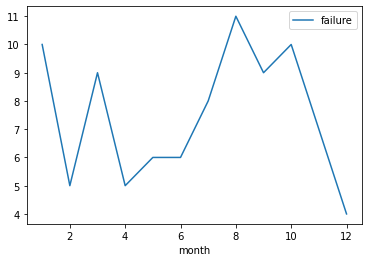

In [191]:
newdata.groupby('month').agg({'failure':lambda x: x.sum()}).plot()
plt.show()

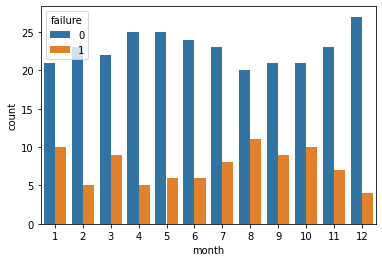

In [192]:
ax = sns.countplot(x="month", hue="failure", data=newdata)
plt.show()

Les données sont distribués maintenant d'une bonne manière qui rend notre modèle important.

In [193]:
newdata.to_csv("./GENDATA/device_S1F0/traindata.csv")

In [194]:
newdata.describe()

failure     metric1     metric2     metric3     metric4     metric5  \
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000   
mean     0.246575   -0.027347    0.302854    0.334128    0.187600   -0.589764   
std      0.431609    0.977673    1.464467    2.397107    1.046383    0.598720   
min      0.000000   -1.735933   -0.145660   -0.042339   -0.124295   -0.844991   
25%      0.000000   -0.777581   -0.145660   -0.042339   -0.124295   -0.843635   
50%      0.000000   -0.040309   -0.143984   -0.042339   -0.124239   -0.814631   
75%      0.000000    0.693936   -0.030287   -0.042339   -0.105799   -0.642766   
max      1.000000    1.720853   10.674075   33.739714    7.267167    4.378624   

          metric6     metric7     metric9  activedays       month    week_day  
count  365.000000  365.000000  365.000000  365.000000  365.000000  365.000000  
mean     0.167197    0.131756   -0.004383  182.000000    6.526027    3.997260  
std      0.802130    1.040476    0.229635  105.510663    3.452584    2.000685  
min     -1.934834   -0.101656   -0.050645    0.000000    1.000000    1.000000  
25%     -0.421912   -0.101656   -0.050645   91.000000    4.000000    2.000000  
50%      0.120148   -0.101656   -0.050645  182.000000    7.000000    4.000000  
75%      0.612296   -0.099223   -0.050369  273.000000   10.000000    6.000000  
max      4.008798    9.599273    2.621107  364.000000   12.000000    7.000000

Essaions de contruire notre modèle :

In [232]:
X=newdata.drop(["failure","date","month","week_day"],axis=1)
Y=newdata.failure

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(1)
clf.fit(X,Y)


KNeighborsClassifier(n_neighbors=1)

Générons des données pour l'année (2016):

In [233]:
nmonths_data = []
m=1
for maxDays in [31,28,31,30,31,30,31,31,30,31,30,31]:
    temp_data = gen.sample(maxDays)
    temp_data["date"] = pd.to_datetime([f'2016-{f"0{m}" if m<10 else m}-{f"0{d}" if d<10 else d}' for d in range(1,maxDays+1) ])
    m+=1
    nmonths_data.append(temp_data)
validdata = pd.concat(nmonths_data,axis=0)
validdata.to_csv("./GENDATA/device_S1F0/orgenvaldata.csv")
validdata.failure.value_counts()

0    262
1    103
Name: failure, dtype: int64

In [234]:
validdata['activedays']=validdata.date-validdata.date.iloc[0]

validdata.activedays = validdata.activedays.astype('str')
validdata.activedays=validdata.activedays.apply(str_to_num)
validdata.activedays = validdata.activedays.astype('int')

validdata['month']=validdata['date'].dt.month
validdata['week_day']=validdata.date.dt.weekday
validdata['week_day'].replace(0,7,inplace=True)
vmonths = validdata['month']
y_true = validdata['failure']
validdata.drop(['failure','date',"month","week_day"],axis=1,inplace=True)

validdata.head()

metric1   metric2   metric3   metric4   metric5   metric6   metric7  \
0 -1.593395 -0.145660 -0.042339 -0.124295 -0.844991 -0.508731 -0.101656   
1 -0.237287 -0.145643 -0.042261 -0.124065 -0.836441  0.506254 -0.101656   
2  0.912668 -0.145324 -0.042339  1.104955 -0.844776  0.322832 -0.101656   
3  0.201851 -0.069080 -0.042338 -0.047424 -0.836333  0.876492 -0.101279   
4 -1.735933 -0.145578 -0.042295 -0.124288 -0.621529 -0.103020 -0.101656   

    metric9  activedays  
0 -0.050645           0  
1 -0.050645           1  
2 -0.050645           2  
3 -0.050645           3  
4 -0.050641           4

Prédiction et extraction des données :

In [235]:
y_pred = clf.predict(validdata)
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
print(f1_score(y_true,y_pred),accuracy_score(y_true,y_pred),recall_score(y_true,y_pred),precision_score(y_true,y_pred),sep = ' -- ')
pd.DataFrame(y_pred).value_counts()

0.30434782608695654 -- 0.6493150684931507 -- 0.27184466019417475 -- 0.345679012345679


0    284
1     81
dtype: int64

In [236]:
validdata['failure']=y_pred
validdata['date']=pd.read_csv("./GENDATA/device_S1F0/orgenvaldata.csv").date.astype('datetime64[ns]')
validdata.to_csv("./GENDATA/device_S1F0/valdata.csv")
validdata['month']=vmonths
validdata['realFail']=y_true
validdata=validdata.groupby('month').agg('sum').loc[:,['failure','realFail']]

validdata.to_csv('results.csv')
validdata.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_10212\264768352.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  validdata=validdata.groupby('month').agg('sum').loc[:,['failure','realFail']]


failure  realFail
month                   
1            6        11
2            6         9
3            4         6
4            4         9
5            6        11